In [728]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [729]:
# Create some sample data

X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

In [730]:
# Create a KMeans object and fit it to the data
kmeans = KMeans(n_clusters=2, random_state=3)
kmeans.fit(X)
X

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

In [731]:
x = X.T[0]
y = X.T[1]

In [732]:
centroids = kmeans.cluster_centers_ # 센트로이드들의 좌표
centroids

array([[2.        , 0.66666667],
       [3.        , 3.33333333]])

In [733]:
cen_x = centroids.T[0]
cen_y = centroids.T[1]

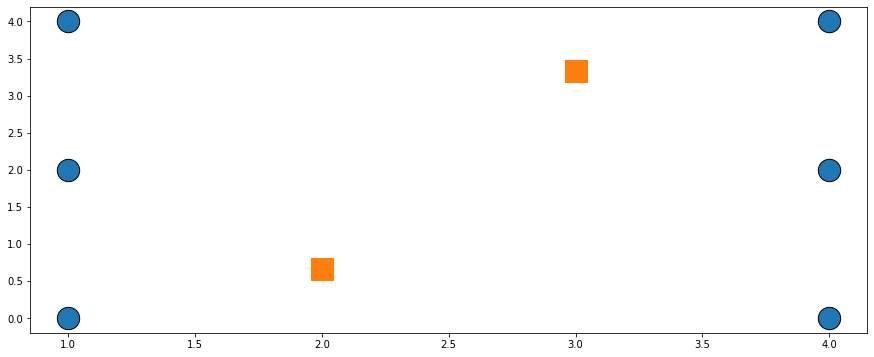

In [734]:
plt.figure(figsize=(15, 6))
plt.scatter(x, y, s=500, edgecolor='black')
plt.scatter(cen_x, cen_y, s=500, marker="s")
plt.show()

In [735]:
# Calculate the distances between each data point and the centroids
distances = pairwise_distances(X, centroids)
distances

array([[1.66666667, 2.40370085],
       [3.48010217, 2.10818511],
       [1.20185043, 3.88730126],
       [2.40370085, 1.66666667],
       [3.88730126, 1.20185043],
       [2.10818511, 3.48010217]])

In [736]:
# Calculate the average distance between each centroid and its assigned data points
avg_distances = np.mean(distances, axis=0)
avg_distances

array([2.45796775, 2.45796775])

In [737]:
# Calculate the average distance between each centroid and its assigned data points
max_distances = np.max(distances, axis=0)
max_distances

array([3.88730126, 3.88730126])

In [738]:
joblib.dump(kmeans, 'kmeans_model.joblib')

['kmeans_model.joblib']

In [740]:
kmeans = joblib.load('kmeans_model.joblib')

In [741]:
X = np.array([[1, 2], [1, 4], [1, 0],[2, 3], [2, 1], [3, 1], [3,3],
              [4, 2], [4, 4], [4, 0]])


In [742]:
centroids = kmeans.cluster_centers_ # 센트로이드들의 좌표
centroids

array([[2.        , 0.66666667],
       [3.        , 3.33333333]])

In [743]:
cen_x = centroids.T[0]
cen_y = centroids.T[1]

In [744]:

y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1])

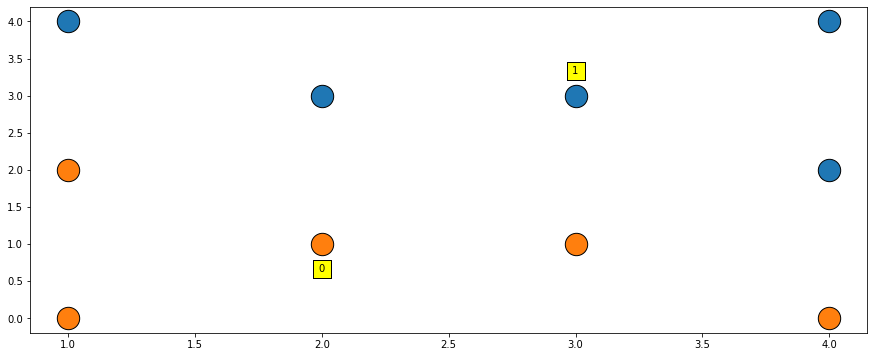

In [745]:
plt.figure(figsize=(15, 6))

for cluster in range(2):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=500, edgecolor='black')
    plt.scatter(cen_x, cen_y, s=300, edgecolor='black', color='yellow', marker='s')
    plt.text(centroids[cluster, 0], centroids[cluster, 1], cluster, va='center', ha='center')
    
plt.show()

In [746]:
# Calculate the distances between each data point and the centroids
distances = pairwise_distances(X, centroids)
distances

array([[1.66666667, 2.40370085],
       [3.48010217, 2.10818511],
       [1.20185043, 3.88730126],
       [2.33333333, 1.05409255],
       [0.33333333, 2.53859104],
       [1.05409255, 2.33333333],
       [2.53859104, 0.33333333],
       [2.40370085, 1.66666667],
       [3.88730126, 1.20185043],
       [2.10818511, 3.48010217]])

In [747]:
# Calculate the average distance between each centroid and its assigned data points
max_distances = np.max(distances, axis=0)
max_distances

array([3.88730126, 3.88730126])

In [748]:
dist1, dist2 = max_distances[0], max_distances[1]

In [749]:
dist1

3.8873012632302

In [758]:
# 새로운 샘플 생성 (이상한 값 포함)
# 학습으로 지정된 센트로이드로부터 각 좌표 거리 측정
# 학습당시 클러스팅 범위(Max 거리)와 비교하여 라벨링

In [750]:
new_X = np.array([[1, 2], [1, 4], [1, 0],[2, 3], [2, 1], [3, 1], [3,3],[5,3],[6,3],[7,3],[8,3],[9,3],
              [4, 2], [4, 4], [4, 0], [10, 2],[10, 5] ,[10, 3]])


In [751]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(new_X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2])

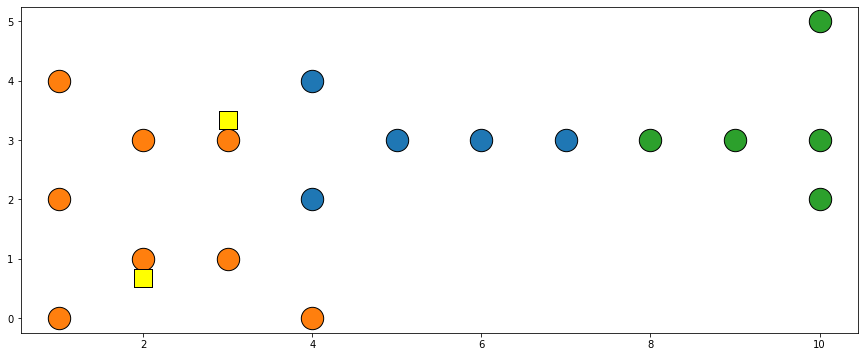

In [752]:
plt.figure(figsize=(15, 6))

for cluster in range(3):
    plt.scatter(new_X[y_kmeans == cluster, 0], new_X[y_kmeans == cluster, 1], s=500, edgecolor='black')
    plt.scatter(cen_x, cen_y, s=300, edgecolor='black', color='yellow', marker='s')

    
plt.show()

In [753]:
distances = pairwise_distances(new_X, centroids)
distances

array([[1.66666667, 2.40370085],
       [3.48010217, 2.10818511],
       [1.20185043, 3.88730126],
       [2.33333333, 1.05409255],
       [0.33333333, 2.53859104],
       [1.05409255, 2.33333333],
       [2.53859104, 0.33333333],
       [3.80058475, 2.02758751],
       [4.63081466, 3.01846171],
       [5.51764845, 4.01386486],
       [6.43773597, 5.01109879],
       [7.37864787, 6.00925213],
       [2.40370085, 1.66666667],
       [3.88730126, 1.20185043],
       [2.10818511, 3.48010217],
       [8.11035004, 7.12585278],
       [9.09822938, 7.19567771],
       [8.33333333, 7.00793201]])

In [754]:
distances[0]

array([1.66666667, 2.40370085])

In [755]:
# train data 모델링에서 나온 클러스터링 Max 거리 이하면 0(정상), 초과면 1(이상)
labels = []
for i in distances:
    if i[0] <= dist1 or i[1] <= dist2:
        label = 0 # 정상
        labels.append(label)
    else:
        label = 1 # 이상
        labels.append(label)
print(labels)
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1]


In [756]:
labels = np.array(labels)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

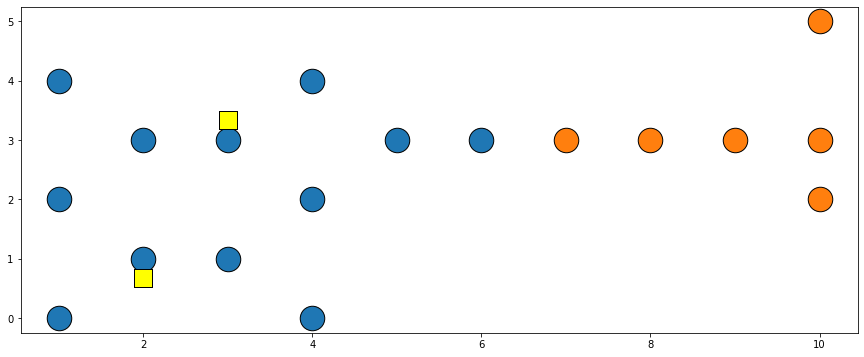

In [757]:
plt.figure(figsize=(15, 6))

for cluster in range(2):
    plt.scatter(new_X[labels == cluster, 0], new_X[labels == cluster, 1], s=600, edgecolor='black')
    plt.scatter(cen_x, cen_y, s=300, edgecolor='black', color='yellow', marker='s')

    
plt.show()